In [36]:
import numpy as np
import pandas as pd

#plot
import matplotlib.pyplot as plt
import seaborn as sns

# dados
import kagglehub
from pathlib import Path
import zipfile


In [4]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

print("Path to dataset files:", path)

100%|██████████| 140M/140M [00:05<00:00, 25.5MB/s] 

Extracting files...


Path to dataset files: C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1


In [26]:
p = Path(path)

train_path = p / "Train Data" / "Train Data Zip"
test_path = p / "Test Data" / "Test Zip"

train_files = list(train_path.rglob("*.csv"))
print("Arquivos de treino:", train_files)

print()

test_files = list(test_path.rglob("*.csv"))
print("Arquivos de treino:", test_files)


Arquivos de treino: [WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/frequency_domain_features_train.csv'), WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv'), WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/time_domain_features_train.csv')]

Arquivos de treino: [WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Test Data/Test Zip/frequency_domain_features_test.csv'), WindowsPath('C:/Users/ander/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Test Data/Test Zip/heart_rate_non_linear_features_test.csv'), WindowsP

In [ ]:
# verificar se tem arquivo ou diretório no caminho
for file in test_path.iterdir():
    print(file, "->", "dir" if file.is_dir() else "file")

C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1\Test Data\Test Zip\frequency_domain_features_test.csv -> file
C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1\Test Data\Test Zip\heart_rate_non_linear_features_test.csv -> file
C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1\Test Data\Test Zip\time_domain_features_test.csv -> file


In [33]:
# treino
train_time = [f for f in train_files if "time_domain" in f.name.lower()][0]

df_train_time = pd.read_csv(train_time)
print(df_train_time.shape)
print(df_train_time.columns)

# teste
test_time = [f for f in test_files if "time_domain" in f.name.lower()][0]

df_test_time = pd.read_csv(test_time)
print(df_test_time.shape)
print(df_test_time.columns)

# união p/ eda
df_time = pd.concat([df_train_time, df_test_time], ignore_index=True)


print(df_time.shape)
#print(df_time.value_counts())
df_time.head()


(369289, 20)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')
(41033, 19)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25',
       'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR',
       'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR',
       'SKEW_REL_RR', 'uuid'],
      dtype='object')
(410322, 20)


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [34]:
df_time.isna().sum()


MEAN_RR                  0
MEDIAN_RR                0
SDRR                     0
RMSSD                    0
SDSD                     0
SDRR_RMSSD               0
HR                   41033
pNN25                    0
pNN50                    0
KURT                     0
SKEW                     0
MEAN_REL_RR              0
MEDIAN_REL_RR            0
SDRR_REL_RR              0
RMSSD_REL_RR             0
SDSD_REL_RR              0
SDRR_RMSSD_REL_RR        0
KURT_REL_RR              0
SKEW_REL_RR              0
uuid                     0
dtype: int64

Trabalhando só com treino por enquanto

In [42]:
df = df_train_time.copy()
print(df.shape)
print(df.dtypes)

(369289, 20)
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
uuid                  object
dtype: object


Histogramas

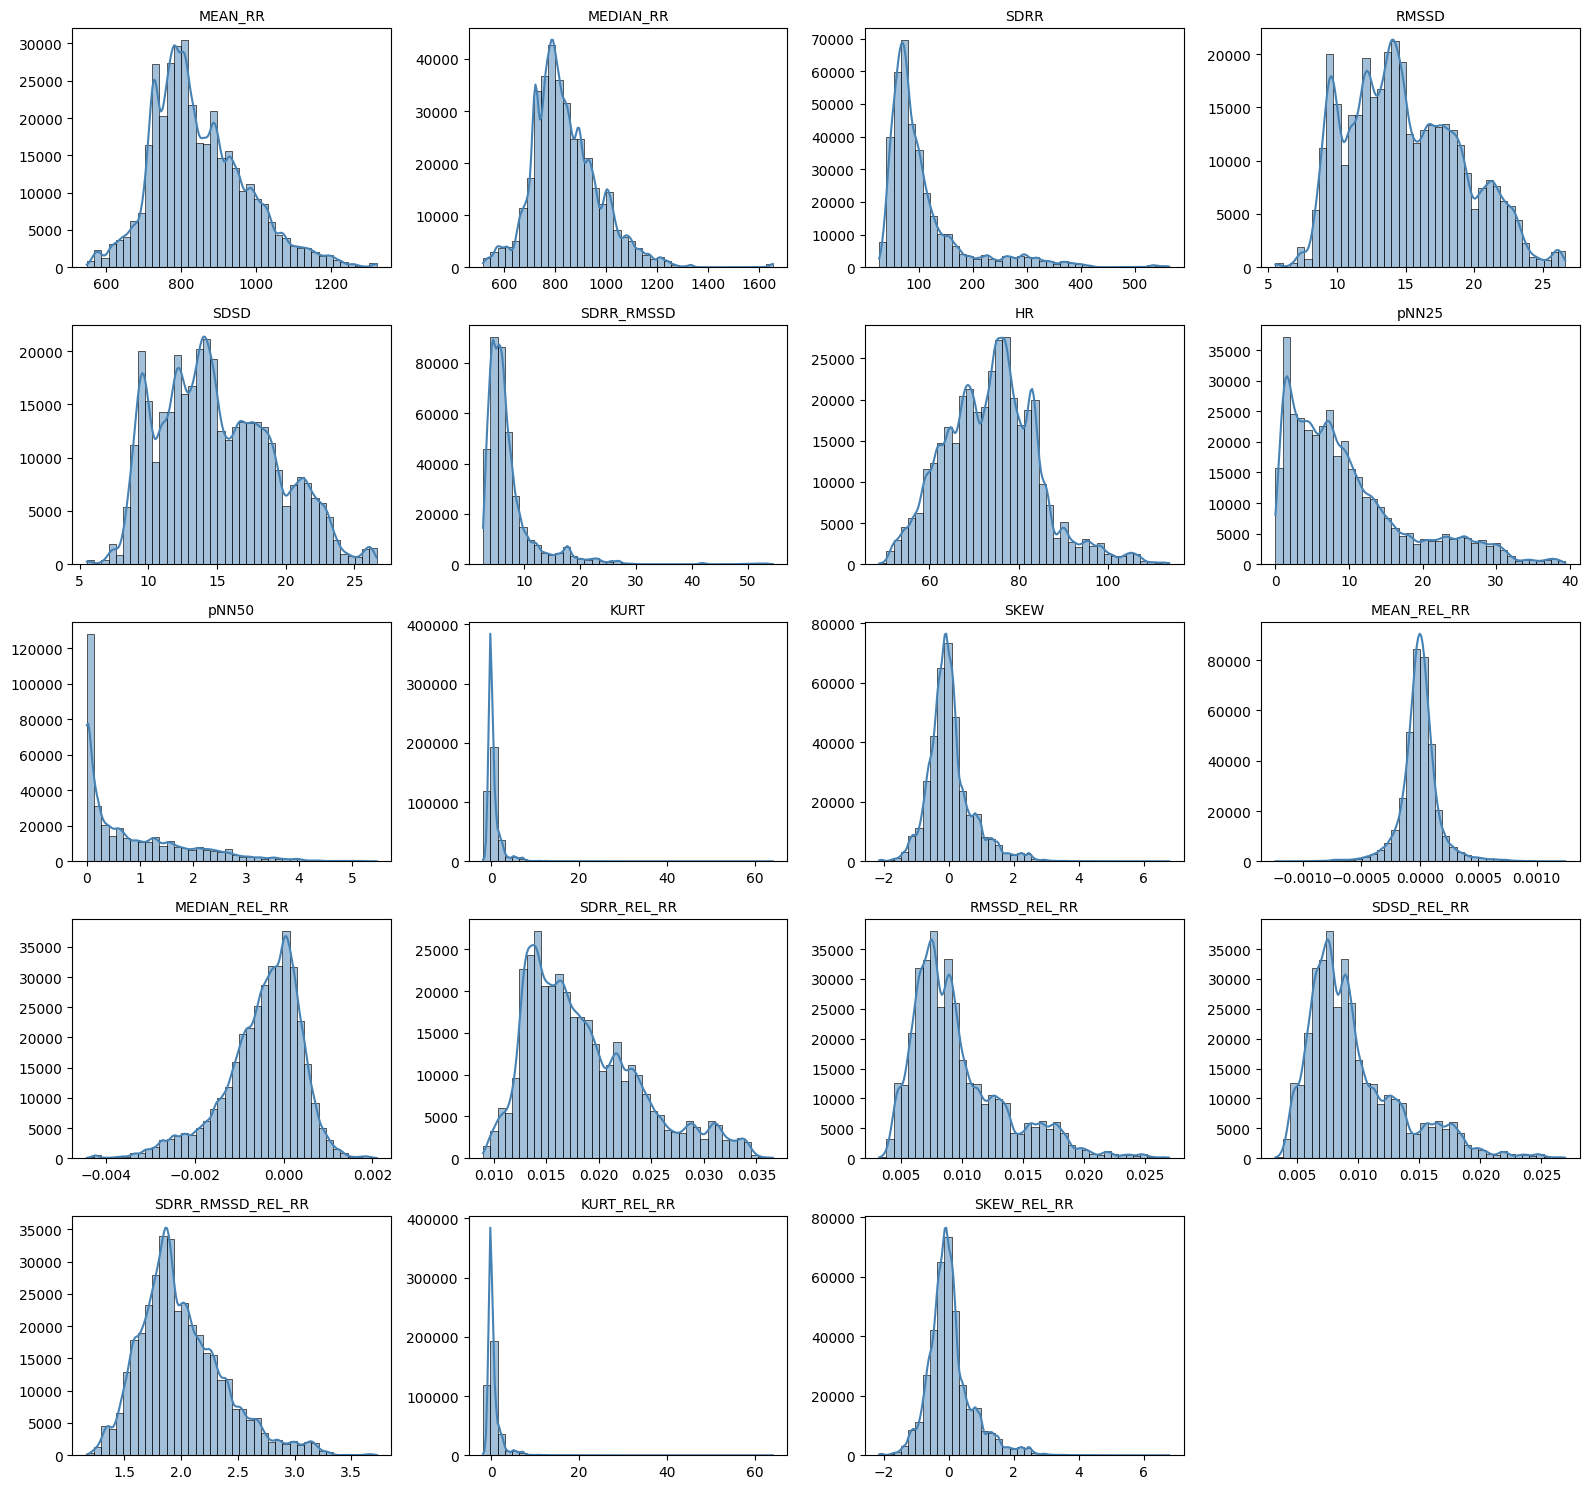

In [43]:
# colunas numéricas
num_cols = df.select_dtypes(include='number').columns

# grid
n_cols = 4  # gráficos por linha
n_rows = int((len(num_cols) + n_cols - 1) / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))

# histograma para cada coluna
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=40, kde=True, color='steelblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [62]:
subset = num_cols[:6]
print(subset)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD'], dtype='object')


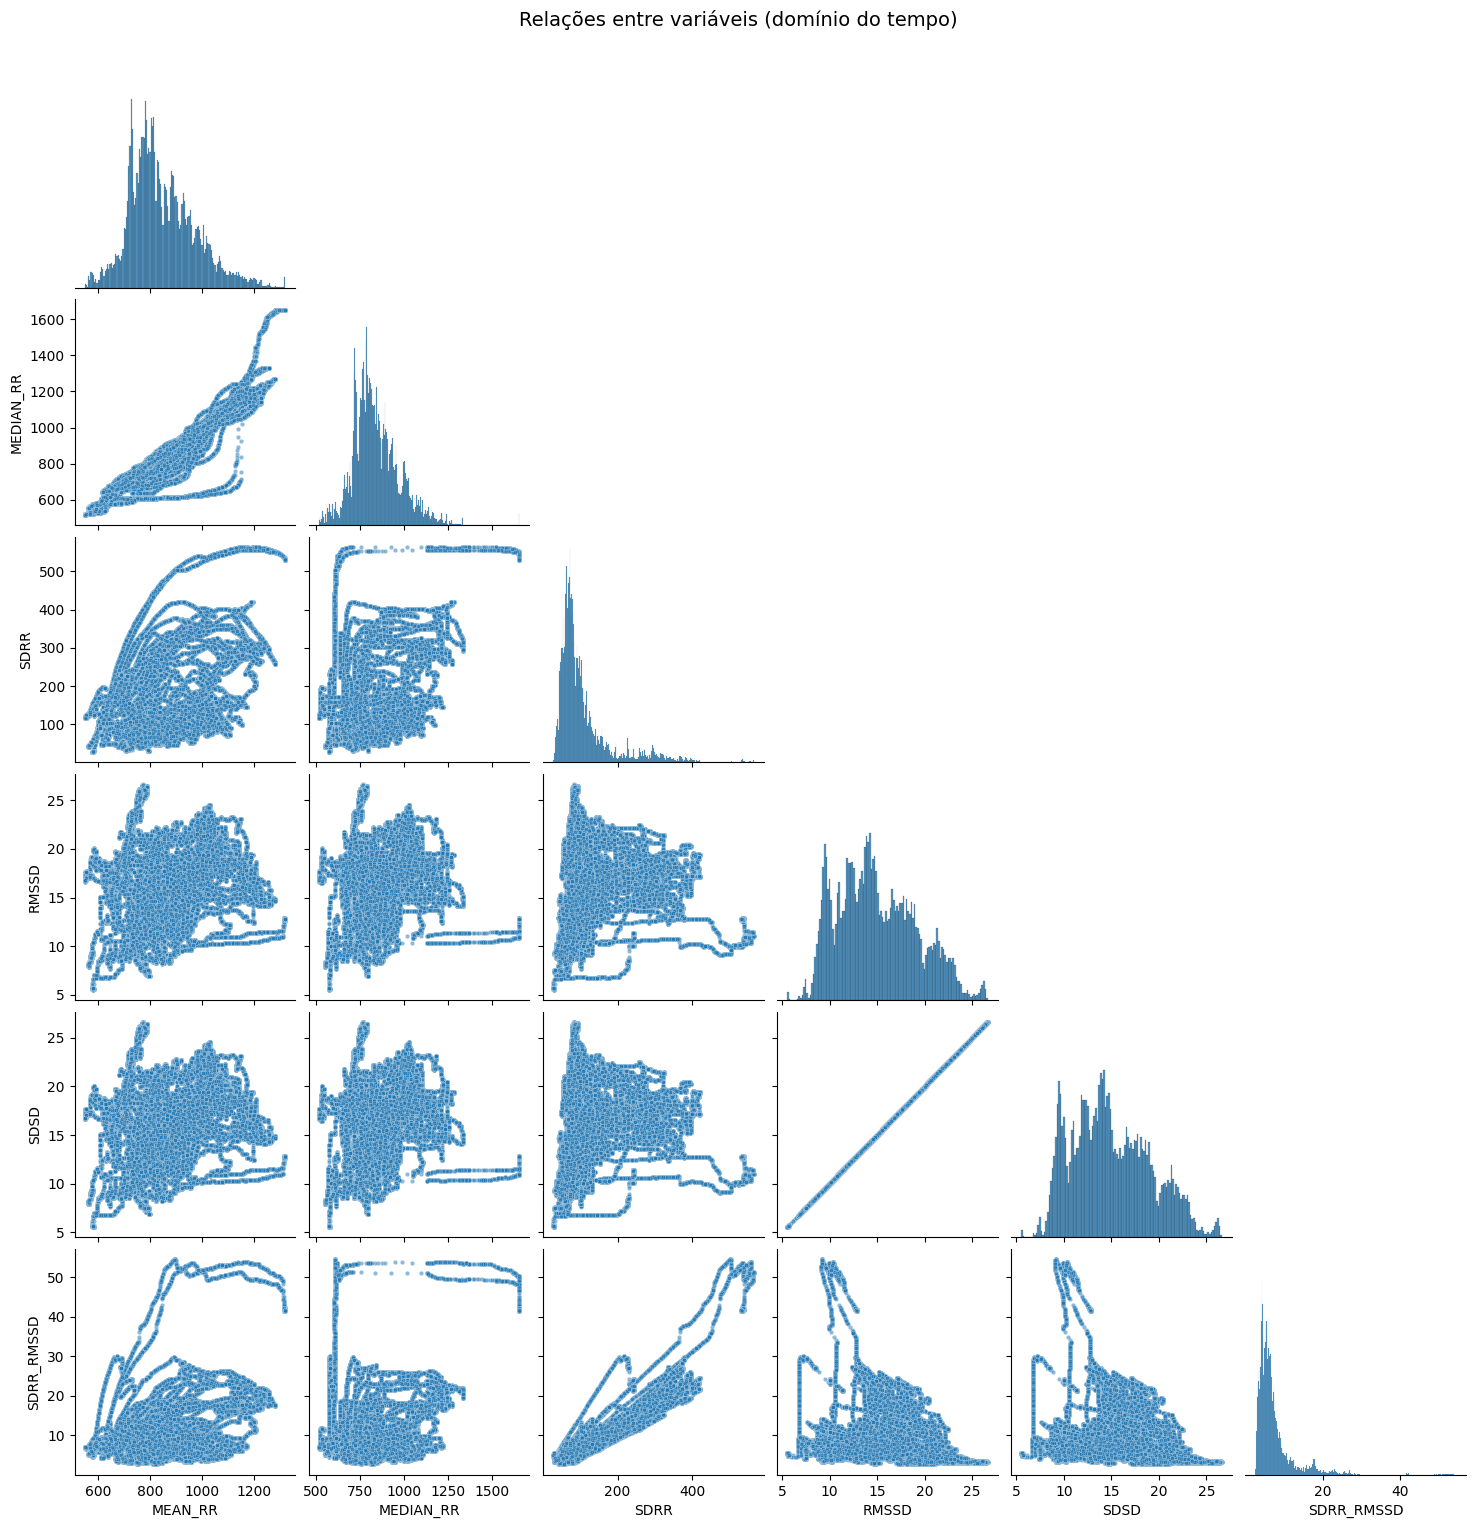

In [63]:
# pairplot
sns.pairplot(df[subset], diag_kind='hist', corner=True, plot_kws={'alpha':0.5, 's':10})

plt.suptitle("Relações entre variáveis (domínio do tempo)", fontsize=14, y=1.02)
plt.show()

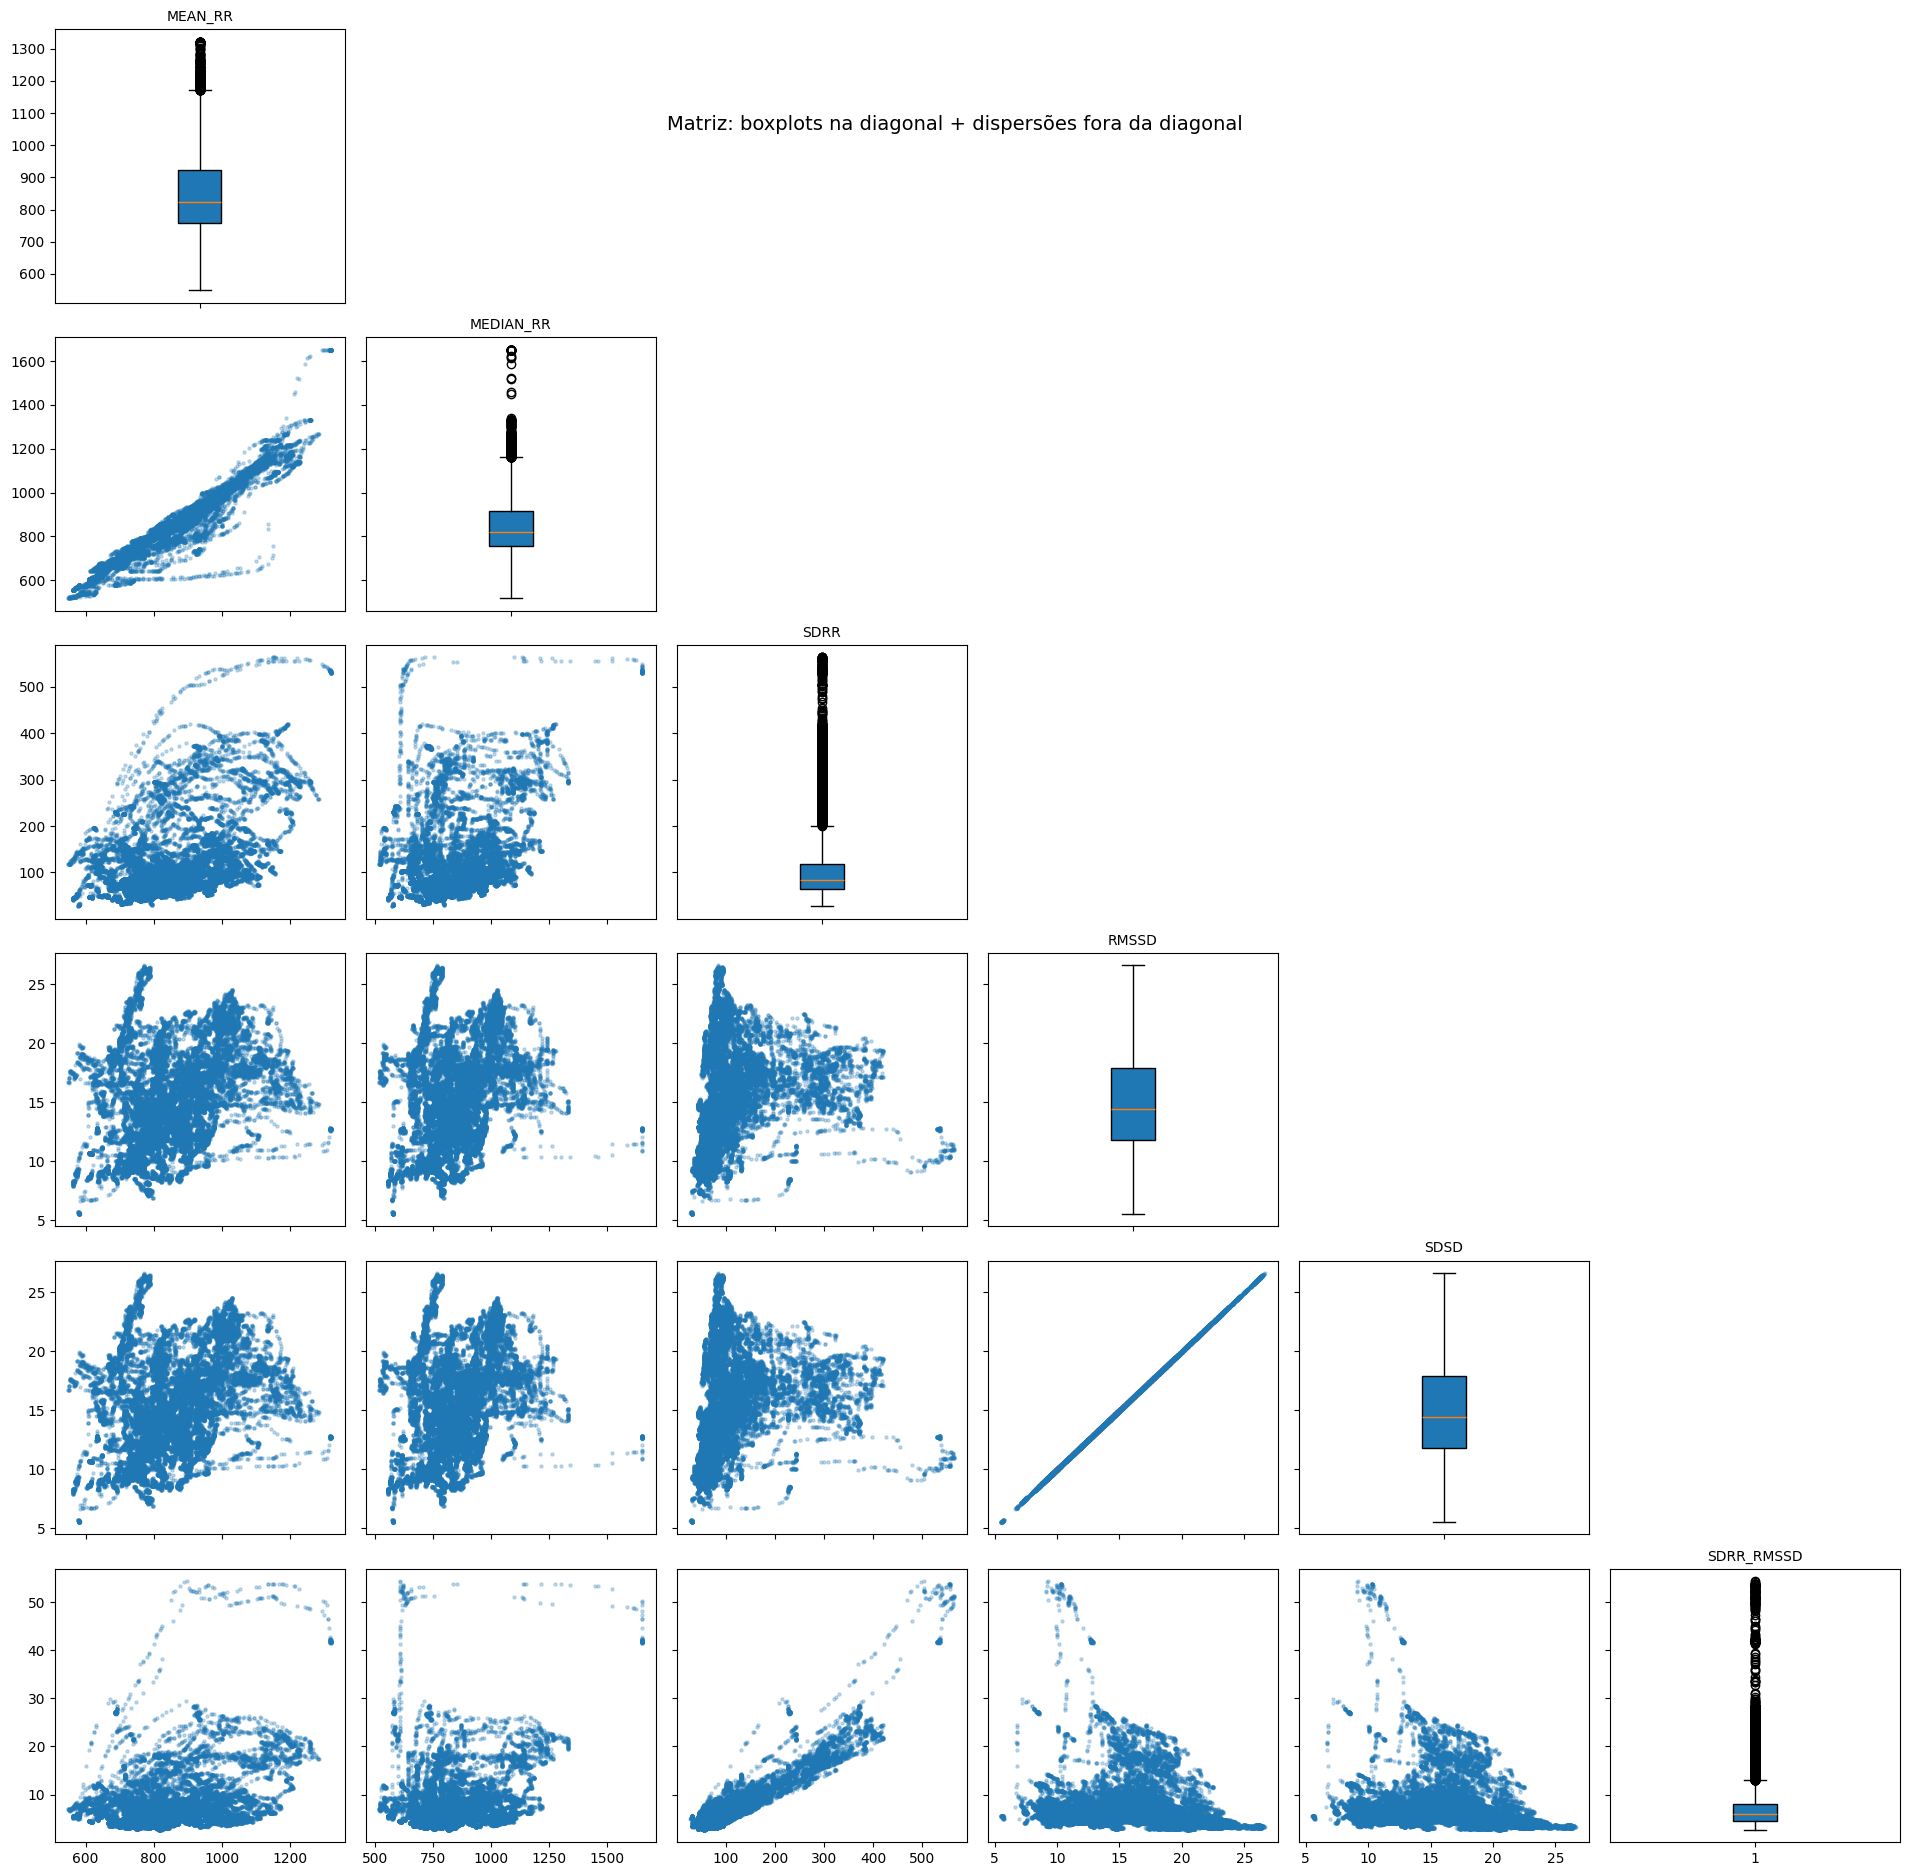

In [64]:
N = min(30000, len(df[subset]))
idx = (np.random.RandomState(42)
       .choice(df[subset].index, size=N, replace=False)) if len(df[subset]) > N else df[subset].index
d = df[subset].loc[idx, subset]

m = len(subset)
fig, axes = plt.subplots(m, m, figsize=(3.2*m, 3.2*m))

for i, ci in enumerate(subset):
    for j, cj in enumerate(subset):
        ax = axes[i, j]
        if i == j:
            # boxplot na diagonal (VERTICAL)
            ax.boxplot(d[ci].dropna().values, vert=True, patch_artist=True)
            ax.set_title(ci, fontsize=10)
        elif i > j:
            x = d[cj].values
            y = d[ci].values
            mask = np.isfinite(x) & np.isfinite(y)
            ax.scatter(x[mask], y[mask], s=5, alpha=0.25)
        else:
            ax.axis('off')  # apaga metade superior

        # limpa ticks internos
        if j != 0: ax.set_yticklabels([])
        if i != m-1: ax.set_xticklabels([])

plt.suptitle('Matriz: boxplots na diagonal + dispersões fora da diagonal', y=0.92, fontsize=14)
plt.tight_layout()
plt.show()
